# Adiabatic Flame Temperature 

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE20255](https://github.com/jckantor/CBE20255). 

### Summary

This notebook demonstrates the calculation of the adiabatic flame temperature for the combustion of methane. The example is adapted with permission of the author from *Computational Methods for Engineers with MATLAB Applications* by James B. Riggs.

## Problem Statement

The adiabatic flame temperature is the temperature that results when a combustible material is reacted with oxygen or air under the following conditions:
    
* The reaction is carried out without heat exchange with the environment (i.e., adiabatic conditions).
* All of the combustible material and the oxygen are consumed.

As a result, the adiabatic flame temperature represents the upper temperature limit of a combustion process. Using the following data, determine the adiabatic flame temperature of methane ($CH_4$) burned in air where the reactants are initially at 25 deg C and 1 atm pressure.

## Solution

The combustion of methane proceeds according to the balanced reaction

$$CH_4 + 3O_2 \longrightarrow CO_2 + 2H_2O$$

with a heat of combustion of -890.4 kJ/gmol. For this calculation we choose a basis of 1 gmol of $CH_4$ because no amount of reactant or product was specified. Next, we apply material balances. Because all of the $CH_4$ is reacted and no excess $O_2$ is used, the mole balances are relatively simple. From the reaction equation, one mole of $CO_2$ and two moles of $H_2O$ are formed from the complete combustion of 1 gmol of $CH_4$ and the $N_2$ in the air used leaves in the product gas. Because 3 moles of $O_2$ are required to consume one mole of CH4 and air is approximately 79 mol% $N_2$, 11.2857 moles of $N_2$ (i.e., (3/0.21) 0.79) leave in the product gas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = dict()
n['CO2'] = 1
n['H2O'] = 2
n['N2'] = 3*(.79/0.21)

for k in n.keys(): 
    print("n[{:3s}] =  {:5.2f}".format(k,n[k]))

n[CO2] =   1.00
n[N2 ] =  11.29
n[H2O] =   2.00


Now consider the energy balance for this system. There is no external work being done on the system, and because it is adiabatic there is no external heat being produced or added to the system. The reactants enter at 25 C and 1 atm, which we use as the reference state for computing changes in specific energy. The system is operated at constant pressure, so the energy balance can be written as an enthalpy balance

$$0 = \Delta H_{Rxn} + \Delta H_{Prod}(T)$$

where the heat liberated by reaction goes into raising the temperature of the product gases. The adiabatic flame temperature is found by solving the enthalpy balance for $T$.

The basis is 1 gmol of $CH_4$ and all of it reacts, the heat of reaction is simply -890,400 J. 

In [3]:
DeltaH_Rxn = -890400

The enthalpy change of the product gases is given by

$$\Delta H_{Prod}(T) = \int_{25}^T \left( n_{CO_2}C_{p,CO_2(g)}(T) + n_{H_2O}C_{p,H_2O(g)}(T) + n_{N_2}C_{p,N_2(g)}(T)\right)\,dT$$

For computational purposes, the temperature dependent heat capacities are represented by anonymous functions. $\Delta H_{Prod}(T)$ is then a function which integrates the heat capacities for a given temperature.

In [4]:
Cp = dict()
Cp['CO2','g'] = lambda T: 36.11 + 4.233e-2*T - 2.887e-5*T**2 + 7.464e-9*T**3
Cp['H2O','g'] = lambda T: 33.46 + 0.688e-2*T + 0.7604e-5*T**2 - 3.593e-9*T**3
Cp['N2','g']  = lambda T: 29.00 + 0.2199e-2*T + 0.5723e-5*T**2 - 2.871e-9*T**3

from scipy import integrate

def DeltaH_Prod(T):
    h1,err = integrate.quad(Cp['CO2','g'],25,T)
    h2,err = integrate.quad(Cp['H2O','g'],25,T)
    h3,err = integrate.quad(Cp['N2','g'],25,T)
    return n['CO2']*h1 + n['H2O']*h2 + n['N2']*h3

The adiabatic flame temperature is found by finding the temperature for which the right-hand side of the enthalpy balance has a value of zero.

In [5]:
f = lambda T: DeltaH_Rxn + DeltaH_Prod(T)

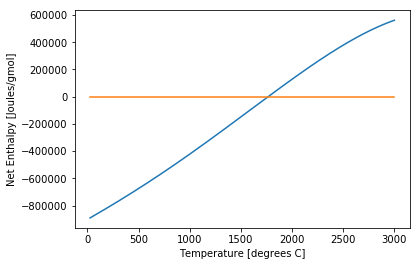

In [6]:
T = np.linspace(25,3000,200)
plt.plot(T,[f(T) for T in T],[25,3000],[0,0])
plt.xlabel('Temperature [degrees C]')
plt.ylabel('Net Enthalpy [Joules/gmol]');

The adiabatic flame temperature is found by using a root-finding algorithm to find a root to the enthalpy balance equation.

In [7]:
from scipy.optimize import brentq

T = brentq(f,25,3000)
print('The adiabatic flame temperature is {:6.1f} degrees C.'.format(T))

The adiabatic flame temperature is 1765.5 degrees C.
